In [1]:
import pandas as pd
df = pd.read_csv("../data/pima/data.csv")
df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
X = df[df.columns[:-1]]
y = df['outcome']

In [3]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# refit='AUC' 추정값을 교차검증한 AUC 점수가 가장 좋은 매개변수
# make_scorer() 사용자정의 평가함수를 지정하는 함수
scoring = {'AUC': 'roc_auc', 'Accuracy':
make_scorer(accuracy_score)}
# refit 최적의 파라미터를 적용하는 옵션
gs = GridSearchCV(DecisionTreeClassifier(random_state=10), 
    param_grid={'min_samples_split':range(2, 403, 10)},
    scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_
results

{'mean_fit_time': array([0.00391622, 0.00339103, 0.00319157, 0.00252447, 0.00319118,
        0.00159535, 0.0031919 , 0.00319133, 0.00299139, 0.00299215,
        0.0027925 , 0.00279264, 0.0029922 , 0.00259328, 0.00279231,
        0.00279374, 0.00279274, 0.00239391, 0.00239329, 0.00219426,
        0.0023931 , 0.00239315, 0.00259395, 0.00239391, 0.00199494,
        0.00219488, 0.00239363, 0.00239382, 0.00239315, 0.0023931 ,
        0.0019949 , 0.00199451, 0.00199447, 0.00199456, 0.00299225,
        0.00239348, 0.00219359, 0.00199456, 0.00219426, 0.00199451,
        0.00179543]),
 'std_fit_time': array([5.22863792e-04, 4.88616714e-04, 3.98707572e-04, 1.33930156e-03,
        7.46238337e-04, 1.35253602e-03, 3.98898335e-04, 3.98946076e-04,
        6.97552626e-07, 6.30600835e-04, 3.99065089e-04, 3.99017334e-04,
        5.09122765e-07, 4.88422046e-04, 3.98850737e-04, 7.45005810e-04,
        7.46454915e-04, 4.89336983e-04, 4.88480592e-04, 3.99184437e-04,
        4.87760051e-04, 4.88207777e-04, 4

In [4]:
print(results['mean_test_AUC'])
print(results['mean_test_Accuracy'])
print(gs.best_params_) #최적의 파라미터

[0.68731656 0.7374724  0.76586932 0.77676834 0.78944235 0.78680154
 0.79156883 0.79634172 0.79734556 0.80109574 0.79870755 0.79870755
 0.79754088 0.7982673  0.80199301 0.79594444 0.78316667 0.77030294
 0.76592558 0.76592558 0.76592558 0.76117365 0.75559713 0.75400594
 0.75400594 0.74200035 0.74200035 0.74200035 0.7377362  0.7377362
 0.7377362  0.7377362  0.7377362  0.7377362  0.73290287 0.73290287
 0.73290287 0.73290287 0.73290287 0.70984207 0.70984207]
[0.72146677 0.72669553 0.7214413  0.7188439  0.73185638 0.73056617
 0.73966556 0.74358713 0.73967405 0.74618453 0.73966556 0.73966556
 0.73966556 0.74096426 0.73312962 0.73705118 0.73575248 0.74484339
 0.74092182 0.74092182 0.74092182 0.73311264 0.73181394 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152]
{'min_samples_split': 142}


142.0
142.0


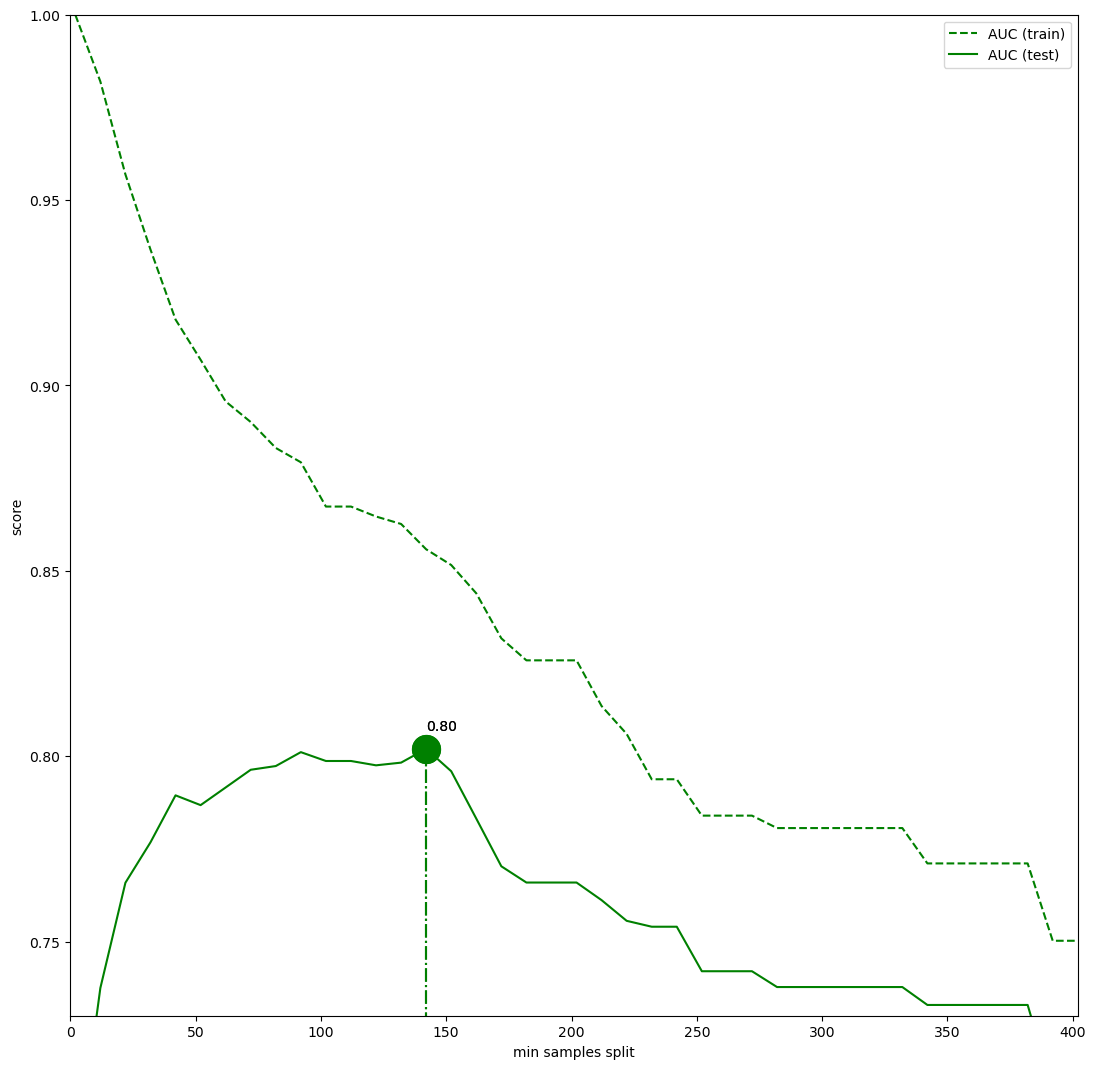

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


92.0
92.0


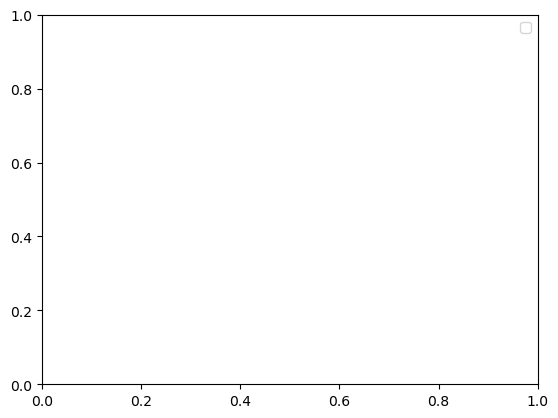

In [6]:
# 다양한 측정 지표를 사용하여 평가한 GridSearchCV
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(13, 13))
plt.xlabel("min samples split")
plt.ylabel("score")
ax = plt.gca() # current axes 반환
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# min_samples_split의 값
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)
for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s'%(sample, scorer)]
        ax.plot(X_axis, sample_score_mean, style, color=color, label="%s (%s)" % (scorer, sample))
        best_index = np.argmax(results['mean_test_%s'%scorer])
        best_score = results['mean_test_%s'%scorer][best_index]
        # 최고 점수에 수직선 표시
        ax.plot([X_axis[best_index],]*2, [0, best_score], linestyle='-.', color=color, marker='o', ms=20)
        # 최고 점수 표시
        ax.annotate("%0.2f"%best_score,
                    (X_axis[best_index], best_score + 0.005))
        print(X_axis[best_index])
    plt.legend()
    plt.show()